In [1]:
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import minimize_scalar

In [10]:
# S2.3 C) D)
# Zielfunktion erstellen und Gradient von h(x) wiedergeben
def h(x):
    xtA = x.T@A
    h = 0.5*(xtA@x) + b.T@x
    return h
def gradient(x,A,b):
    return A@x + b

In [11]:
# minimieren <g,y>
def f(y):
    global n
    g = gradient(x,A,b)
    sum = 0
    for i in range(n):
        sum = sum + g[i]*y[i]
    return sum    
    
def g1(y):
    result = np.array(alpha-max(np.abs(y)))
    return result
cons =({'type':'ineq','fun':g1})

In [12]:
# minimieren h(x) mit richtiger Schrittweite t
def func(t):
    global n,alpha
    #res = minimize(f,np.array([1,1,1]),constraints=cons,options={'disp':True})
    res = minimize(f,np.ones((1,n)),constraints=cons)
    Xt = t*x.T + (1-t)* res.x
    XtA = Xt@A
    h = 0.5*(XtA@Xt.T) + b.T@Xt.T
    return h

In [13]:
def FW(A,b,alpha,tol):
    global n
    global x
    global res
    global minh
    res = minimize(f,np.ones((1,n)),constraints=cons)
    minh = minimize_scalar(func,bounds=(0,1),method='bounded')
    test = 1 - minh.x
    while(test>tol):
        new_x = minh.x*x.T + (1-minh.x)* res.x
        x = new_x.T
        res = minimize(f,np.ones((1,n)),constraints=cons)
        minh = minimize_scalar(func,bounds=(0,1),method='bounded')
        test=1-minh.x
    return x

In [27]:
# Matrix A erstellen 
A = np.array([[1,1.5,2],[1.5,2,2.5],[2,2.5,3]])
# b erstellen
b = np.array([[1],[1],[1]])
# startpunkt erstellen
x = np.array([[1],[1],[1]])
# alpha = 2
# toleranz = 10**-5
n = 3
alpha = 2
FW(A,b,alpha,10**-5)

array([[-1.98423056],
       [-1.52085972],
       [ 2.0081454 ]])

In [30]:
# (-2,-1.5,2) ist die Minimalpunkt durch Frank-Wolfe Algorithmus
# Dann vergleichen mit einem Standardsolver aus Scipy
# S2.3 E)
def g4(y,alpha=2):
    result = np.array(alpha-abs(y[0]))
    return result
def g5(y,alpha=2):
    result = np.array(alpha-abs(y[1]))
    return result
def g6(y,alpha=2):
    result = np.array(alpha-abs(y[2]))
    return result
# Ungleichung g1 g2 g3   
cons2 =({'type':'ineq','fun':g4},
        {'type':'ineq','fun':g5},
        {'type':'ineq','fun':g6})
# Startpunkt fuer min h(x)
x0 = np.zeros((1,3))
res2 = minimize(h,x0.T,constraints=cons2,options={'disp':True})

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -2.2500000000035456
            Iterations: 8
            Function evaluations: 41
            Gradient evaluations: 8


In [31]:
# Das Ergebnis ist auch (-2,-1.5,2)
res2.x

array([-2.        , -1.49999999,  2.        ])

In [55]:
# S3.e
n=1
alpha= 1/(10*n)
def g3(x):
    global alpha
    result = np.array(alpha-max(np.abs(x)))
    return result
cons3 =({'type':'ineq','fun':g3})

In [56]:
# Berechnen die folgende Laufzeit von FW
import time
import math
import matplotlib.pyplot as plt
x_achse = []
y_achse = []
for n in range(1,15,1):
    global A,b,x
    A = np.random.random((n,n))
    b = np.random.random((n,1))
    x = np.zeros((n,1))
    start = time.time()
    FW(A,b,alpha,10**-5)
    end = time.time()
    t = end -start
    x_achse.append(n)
    y_achse.append(t)

In [57]:
# Berechnen die folgende Laufzeit von Standardsolver aus Scipy
x_achse1 = []
y_achse1 = []
for n in range (1,15,1):
    global A,b,x
    A = np.random.random((n,n))
    b = np.random.random((n,1))
    x = np.ones((n,1)) 
    x0 = np.zeros((1,n))
    start = time.time()
    res2 = minimize(h,x0.T,constraints=cons3)
    end = time.time()
    t = end - start
    x_achse1.append(n)
    y_achse1.append(t)   

<function matplotlib.pyplot.show(*args, **kw)>

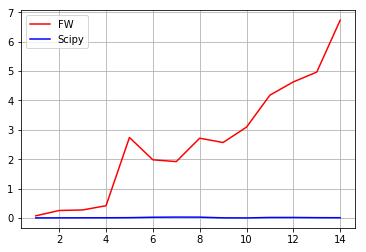

In [58]:
fig,ax =plt.subplots()
ax.plot(x_achse,y_achse,label='FW',color='r')
ax.plot(x_achse1,y_achse1,label='Scipy',color='b')
plt.legend(loc='best')
plt.grid(True)
plt.show